## Text Analysis of Seneca's Letters

Seneca was a famous Roman statesman, philosopher, and Stoic (first century CE). Seneca has, perhaps, the largest body of stoic writings that has survived from ancient times. His letters to Lucilius are some of his most famous works and provide an interesting subject for the application of unsupervied machine learning.


### Web Scraping

First, we'll have to get Seneca's letters into a usable form. We will use BeautufulSoup to do some web scraping from the source below: 

__Moral letters to Lucilius__ (Epistulae morales ad Lucilium) <br>
by Seneca, translated by Richard Mott Gummere <br>
Loeb Classical Library edition; volume 1 published 1917; volume 2 published 1920; volume 3 published 1925 <br>
Letters collected from https://en.wikisource.org/wiki/Moral_letters_to_Lucilius 

In [329]:
import requests
from bs4 import BeautifulSoup

In [330]:
url_base_string = "https://en.wikisource.org/wiki/Moral_letters_to_Lucilius/Letter_" 
letters = pd.DataFrame(index=range(1,125), columns=["Text"])

In [331]:
for i in range(1, 125):
    page = requests.get(url_base_string + str(i))
    soup = BeautifulSoup(page.text, "html.parser")
    letter_div = soup.find(class_='mw-parser-output')
    letter_paragraphs = letter_div.find_all("p")
    letter_text = ""
    for j in range(len(letter_paragraphs)):
        letter_text = letter_text + letter_paragraphs[j].text
        letters.loc[i, "Text"] = letter_text

In [332]:
letters

,Text
1,"Greetings from Seneca to his friend Lucilius. \n1. Continue to act thus, my dear Lucilius – set yourself free for your own sake; gather and save your time, which till lately has been forced from you, or filched away, or has merely slipped from your hands. Make yourself believe the truth of my wo..."
2,"1. Judging by what you write me, and by what I hear, I am forming a good opinion regarding your future. You do not run hither and thither and distract yourself by changing your abode; for such restlessness is the sign of a disordered spirit. The primary indication, to my thinking, of a well-or..."
3,"1. You have sent a letter to me through the hand of a ""friend"" of yours, as you call him. And in your very next sentence you warn me not to discuss with him all the matters that concern you, saying that even you yourself are not accustomed to do this; in other words, you have in the same letter..."
4,"1. Keep on as you have begun, and make all possible haste, so that you may have longer enjoyment of an improved mind, one that is at peace with itself. Doubtless you will derive enjoyment during the time when you are improving your mind and setting it at peace with itself; but quite different i..."
5,"1. I commend you and rejoice in the fact that you are persistent in your studies, and that, putting all else aside, you make it each day your endeavour to become a better man. I do not merely exhort you to keep at it; I actually beg you to do so. I warn you, however, not to act after the fashi..."
6,"1. I feel, my dear Lucilius, that I am being not only reformed, but transformed. I do not yet, however, assure myself, or indulge the hope, that there are no elements left in me which need to be changed. Of course there are many that should be made more compact, or made thinner, or be brought i..."
7,"1. Do you ask me what you should regard as especially to be avoided? I say, crowds; for as yet you cannot trust yourself to them with safety. I shall admit my own weakness, at any rate; for I never bring back home the same character that I took abroad with me. Something of that which I have for..."
8,"1. ""Do you bid me,"" you say, ""shun the throng, and withdraw from men, and be content with my own conscience? Where are the counsels of your school, which order a man to die in the midst of active work?"" As to the course[1] which I seem to you to be urging on you now and then, my object in shutt..."
9,"1. You desire to know whether Epicurus is right when, in one of his letters,[1] he rebukes those who hold that the wise man is self-sufficient and for that reason does not stand in need of friendships. This is the objection raised by Epicurus against Stilbo and those who believe[2] that the Supr..."
10,"1. Yes, I do not change my opinion: avoid the many, avoid the few, avoid even the individual. I know of no one with whom I should be willing to have you shared. And see what an opinion of you I have; for I dare to trust you with your own self. Crates, they say, the disciple of the very Stilbo..."


### Unsupervised Machine Learning

In [333]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, ward

pd.options.display.max_colwidth = 300

letters = pd.read_csv("../data/letters.csv", index_col="Letter")
letters = letters.iloc[:20]

In [334]:
letters.shape

(124, 1)

In [335]:
letters.tail()

,Text
120,"1. Your letter roamed, over several little problems, but finally dwelt upon this alone, asking for explanation: ""How do we acquire a knowledge of that which is good and that which is honourable?"" In the opinion of other schools,[1] these two qualities are distinct; among our followers, however, ..."
121,"1. You will bring suit against me, I feel sure, when I set forth for you to-day's little problem, with which we have already fumbled long enough. You will cry out again: ""What has this to do with character?"" Cry out if you like, but let me first of all match you with other opponents,[1] against..."
122,"1. The day has already begun to lessen. It has shrunk considerably, but yet will still allow a goodly space of time if one rises, so to speak, with the day itself. We are more industrious, and we are better men if we anticipate the day and welcome the dawn; but we are base churls if we lie doz..."
123,"1. Wearied with the discomfort rather than with the length of my journey, I have reached my Alban villa late at night, and I find nothing in readiness except myself. So I am getting rid of fatigue at my writing-table: I derive some good from this tardiness on the part of my cook and my baker. ..."
124,"1. Full many an ancient precept could I give,\nDidst thou not shrink, and feel it shame to learn\nSuch lowly duties.[1]\nBut you do not shrink, nor are you deterred by any subtleties of study. For your cultivated mind is not wont to investigate such important subjects in a free-and-easy manner. ..."


In [336]:
num = []
for i in range(1000):
    num.append(str(i))

In [337]:
my_stopwords = ENGLISH_STOP_WORDS.union(num)
tfidf_vec = TfidfVectorizer(use_idf=False, 
                            stop_words=my_stopwords, 
                            max_features=5000,
                           )

In [338]:
tfidf_mat = tfidf_vec.fit_transform(letters['Text'])

In [348]:
tfidf_df = pd.DataFrame(tfidf_mat.A, columns=tfidf_vec.get_feature_names(), index=letters.index)
tfidf_df.head()

,abandon,abandoned,abandoning,abeyance,abide,abides,abilities,ability,abject,able,...,yonder,yore,young,younger,youth,youths,zeal,zealous,zeno,zest
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063702,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.034716,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.037430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### What words have the highest frequency? 
(we have not weigthed by idf yet)

In [340]:
tfidf_df.sum().sort_values(ascending=False).head(15)

man       26.784071
men       16.525416
good      14.268286
things    13.239110
life      12.039816
shall     11.426768
time      10.249537
does       9.739317
make       7.787076
say        7.567896
mind       7.417960
death      7.264219
let        7.151787
great      7.022743
soul       6.941119
dtype: float64

#### Now we will weight by idf

In [341]:
tfidf_vec.use_idf = True

In [342]:
tfidf_mat = tfidf_vec.fit_transform(letters['Text'])

In [347]:
tfidf_df = pd.DataFrame(tfidf_mat.A, columns=tfidf_vec.get_feature_names(), index=letters.index)
tfidf_df.head()

,abandon,abandoned,abandoning,abeyance,abide,abides,abilities,ability,abject,able,...,yonder,yore,young,younger,youth,youths,zeal,zealous,zeno,zest
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063702,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.034716,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.037430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### and see which words have the highest tf-idf values

In [344]:
tfidf_df.sum().sort_values(ascending=False).head(15)

man       11.268664
good       7.769876
men        7.372648
things     6.598596
life       6.259751
shall      5.416765
death      5.199131
does       5.039781
time       4.899091
virtue     4.126905
soul       4.057854
say        3.928446
mind       3.897566
let        3.871568
nature     3.860364
dtype: float64

### Hierarchical Clustering

In [345]:
dist = 1 - cosine_similarity(X=tfidf_mat)

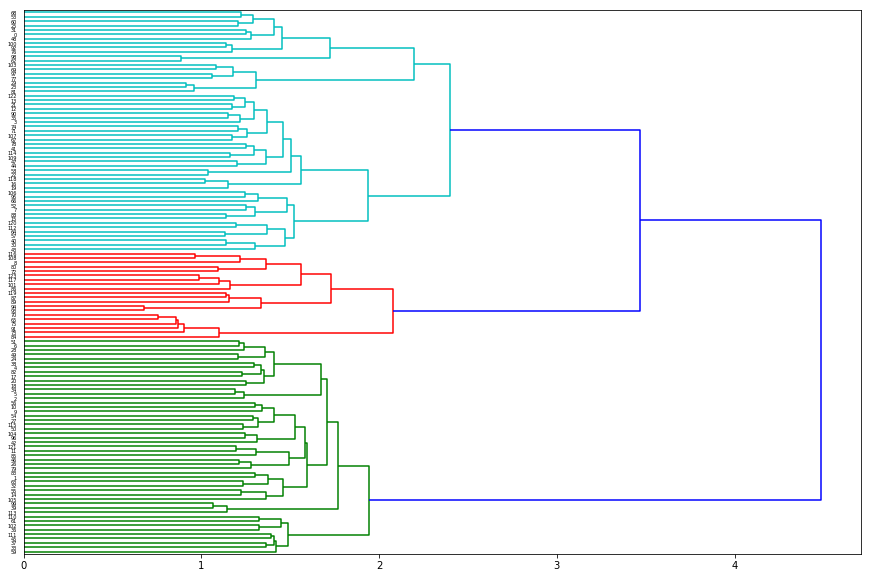

In [354]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax = dendrogram(ward(dist), orientation='right')
plt.show()